# **4. Linear Regression**

Prediksi Salary berdasarkan fitur Age, Work Experience, Gender, dan Education dengan menggunakan Multiple Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Connect colabs dengan drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Membaca file csv dan menampilkan dalam bentuk tabel
df = pd.read_excel(r'/content/drive/MyDrive/Kuliah/foundation/Manager Salary Survey 2021-FINAL (2).xlsx')
# Software Engineer              286
# Project Manager                230
# Senior Software Engineer       196
# Director                       196
# Program Manager                152
display(df)

,time,age,industry,job_title,need_additional_context,salary,monetary_compentation,currency,indicate_currency,income_additional_contex,country,US_state,city,work_experience_overall,work_experince_field,hights_education_complate,gender,your_race,USD Salary,country_clean
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0000,United States
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,?,White,67786.6098,United Kingdom
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0000,United States
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,62000.0000,United States
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,60000.0000,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,NaN,190000,14000.0,USD,NaN,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American,190000.0000,United States
27870,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,?,55000.0000,United States
27871,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,NaN,52416,NaN,USD,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White,52416.0000,United States
27872,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,NaN,36000,NaN,USD,NaN,NaN,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American,36000.0000,United States


Kode di bawah untuk mendapatkan deskripsi statistik dari kolom 'USD Salary'. Deskripsi statistik yang diperoleh meliputi jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil pertama, median, kuartil ketiga, nilai maksimum dari data.

In [ ]:
df['USD Salary'].describe()
# df['USD Salary'].max()

count    2.787400e+04
mean     9.106027e+04
std      6.145100e+05
min      0.000000e+00
25%      5.300000e+04
50%      7.400000e+04
75%      1.050526e+05
max      1.020000e+08
Name: USD Salary, dtype: float64

In [ ]:
# # Disini kita menghilangkan 1 outliner
df = df[df["USD Salary"] != 102000000.0]
df = df[df["USD Salary"] != 2111538.0]
# df = df[df["USD Salary"] != 1250000.0]

# #teradpat 1 outlier
# len(df)

In [ ]:
#menghitung jumlah job title yang unik (distinct)

len(df['job_title'].unique())

14262

*   kode di bawah untuk mengubah nilai kategorikal dari kolom job_title menjadi nilai numerik yang sesuai untuk dapat diolah lebih lanjut 
*   method value_counts(), digunakan untuk menghitung jumlah kemunculan setiap nilai unik pada kolom job_title. Kemudian, nilai-nilai tersebut akan diurutkan berdasarkan jumlah kemunculan dari yang paling sering muncul hingga yang paling jarang.
*   selanjutnya membuat dictionary job_dict yang berisi pasangan key-value, dimana key adalah nilai kategorikal dari job_title dan value adalah integer yang merepresentasikan nilai tersebut
*   terakhir membuat kolom baru job_title_int yang akan berisi nilai integer yang merepresentasikan nilai kategorikal pada kolom job_title dengan menggunakan method map() untuk memetakan setiap nilai kategorikal pada job_title ke nilai integer yang sesuai pada job_dict.

In [ ]:
# Create a dictionary mapping each job title to an integer value based on their frequency
job_counts = df['job_title'].value_counts()
job_dict = {job: idx for idx, job in enumerate(job_counts.index)}

# Map the job titles to their corresponding integer values
df['job_title_int'] = df['job_title'].map(job_dict)

*   Kode di bawah digunakan untuk mengubah nilai-nilai kategori dalam kolom "industry" menjadi bilangan bulat dengan cara membuat kamus (dictionary) yang memetakan masing-masing nilai kategori menjadi bilangan bulat berdasarkan frekuensi kemunculan dari nilai kategori tersebut.
*    melakukan penghitungan frekuensi kemunculan dari setiap nilai kategori dalam kolom "industry" dengan menggunakan method value_counts(). Hasil perhitungan akan disimpan dalam variabel job_counts.
*   kemudian membuat kamus (job_dict) yang akan memetakan setiap nilai kategori dalam kolom "industry" menjadi bilangan bulat berdasarkan indeksnya pada series job_counts. Indeks pada job_counts menunjukkan urutan frekuensi kemunculan dari nilai kategori yang berbeda dalam kolom "industry".
*   selanjutntya, kamus job_dict digunakan untuk mengubah nilai-nilai kategori dalam kolom "industry" menjadi bilangan bulat dan disimpan dalam kolom baru dengan nama "industry_int" menggunakan method map()

In [ ]:
# Create a dictionary mapping each job title to an integer value based on their frequency
job_counts = df['industry'].value_counts()
job_dict = {job: idx for idx, job in enumerate(job_counts.index)}

# Map the job titles to their corresponding integer values
df['industry_int'] = df['industry'].map(job_dict)

In [ ]:
#menghapus baris atau data pada kolom country_clean yang memiliki nilai NaN atau null
df = df.dropna(subset=["country_clean"])

*   kode di bawah untuk membuat kamus yang memetakan setiap negara ke nilai integer yang dalam kolom 'country_clean'.
*   fungsi 'value_counts()' pada kolom 'country_clean' untuk menghitung frekuensi kemunculan setiap negara dalam kolom tersebut.
*   membuat kamus untuk memetakan setiap negara ke nilai integer yang sesuai dengan masing-masing negaranya dalam kolom baru 'country_clean_int' menggunakan fungsi 'map()'.

In [ ]:
# Create a dictionary mapping each job title to an integer value based on their frequency
job_counts = df['country_clean'].value_counts()
job_dict = {job: idx for idx, job in enumerate(job_counts.index)}

# Map the job titles to their corresponding integer values
df['country_clean_int'] = df['country_clean'].map(job_dict)

In [ ]:
# Menghitung jumlah nilai dalam kolom gender
df['gender'].value_counts()

Woman    20443
Man       5149
?          983
Name: gender, dtype: int64

kode di bawah digunakan untuk melakukan cleaning data. dimana apabila pada kolom gender dan hights_education_complate terdapat baris yang kosong maka akan diisi dengan unknown. serta apabila terdapat baris pada kolom gender yang berisi '?' akan diganti dengan unknown.

In [ ]:
#mengisi kolom yang NA
df['gender'] = df['gender'].fillna('unknown')
df['gender'] = df['gender'].replace('?', 'unknown')

df['hights_education_complate'] = df['hights_education_complate'].fillna('unknown')
df['gender'].value_counts()

Woman      20443
Man         5149
unknown     1144
Name: gender, dtype: int64

Kode di bawah digunakan untuk melakukan konversi terhadap data dalam kolom age
*  baris yang berisi nilai '65 or over' akan dikonversi ke dalam nilai integer 66
*  baris yang berisi nilai 'under 18' akan dikonversi kedalam nilai 0



In [ ]:
# Konversi nilai string ke numerik
def convert_age(age):
    if age == '65 or over':
        return 66
    elif age == 'under 18':
        return 0
    else:
        return int(age.split('-')[0])
df['age_number'] = df['age'].apply(convert_age) # Ambil nilai pertama dari rentang umur

kode di bawah digunakan untuk membuat kamus yang merepresentasikan jumlah tahun pengalaman kerja untuk setiap rentang nilai, kamus ini kemudian digunakan untuk mengubah nilai dalam kolom work_experience_overall menjadi numerik dengan menggunakan fungsi apply dan lambda 

In [ ]:
# Buat dictionary yang merepresentasikan jumlah tahun pengalaman kerja untuk setiap rentang nilai
exp_dict = {'1 year or less': 1, '2 - 4 years': 3, '5-7 years': 6, '8 - 10 years': 9, 
            '11 - 20 years': 15, '21 - 30 years': 25, '31 - 40 years': 35, 
            '41 years or more': 41}

# Ubah nilai work_experience_overall ke dalam nilai numerik
df['work_experience_overall_number'] = df['work_experience_overall'].apply(lambda x: exp_dict[x])

kode di bawah digunakan untuk membuat kamus yang merepresentasikan jumlah tahun pengalaman kerja untuk setiap rentang nilai, kamus ini kemudian digunakan untuk mengubah nilai dalam kolom work_experience_field menjadi numerik dengan menggunakan fungsi apply dan lambda

In [ ]:
# Buat dictionary yang merepresentasikan jumlah tahun pengalaman kerja untuk setiap rentang nilai
exp_dict = {'1 year or less': 1, '2 - 4 years': 3, '5-7 years': 6, '8 - 10 years': 9, 
            '11 - 20 years': 15, '21 - 30 years': 25, '31 - 40 years': 35, 
            '41 years or more': 41}

# Ubah nilai work_experience_field ke dalam nilai numerik
df['work_experience_field_number'] = df['work_experince_field'].apply(lambda x: exp_dict[x])

kode di bawah digunakan untuk membuat kamus yang merepresentasikan jumlah pendidikan tertinggiuntuk setiap rentang nilai, kamus ini kemudian digunakan untuk mengubah nilai dalam kolom hights_education_complate menjadi numerik dengan menggunakan fungsi apply dan lambda

In [ ]:
# Buat dictionary mapping untuk mengkonversi nilai education
edu_mapping = {"Some college": 0, "High School": 1, "College degree": 2, 
               "Master's degree": 3, "Professional degree (MD, JD, etc.)": 4, 
               "PhD": 5, "unknown": 6}

# Gunakan method map() untuk mengkonversi nilai education ke integer
df['education_number'] = df['hights_education_complate'].map(edu_mapping).astype(int)

*   kode di bawah digunakan untuk menambah baris kosong dalam kolom gender dengan nilai 'unknown', kemudian mereplace nilai'?' menjadi unknown
*   membuat kamus utnuk mengkonversi nilai gender ke dalam nilai numerik



In [ ]:
df['gender'] = df['gender'].fillna('unknown')
df['gender'] = df['gender'].replace('?', 'unknown')

# Buat dictionary mapping untuk mengkonversi nilai gender
gender_mapping = {"unknown": 0, "Man": 1, "Woman": 2}

# Gunakan method map() untuk mengkonversi nilai gender ke integer
df['gender_angka'] = df['gender'].map(gender_mapping).astype(int)

Kode di bawah digunakan untuk membuat heatmap korelasi

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

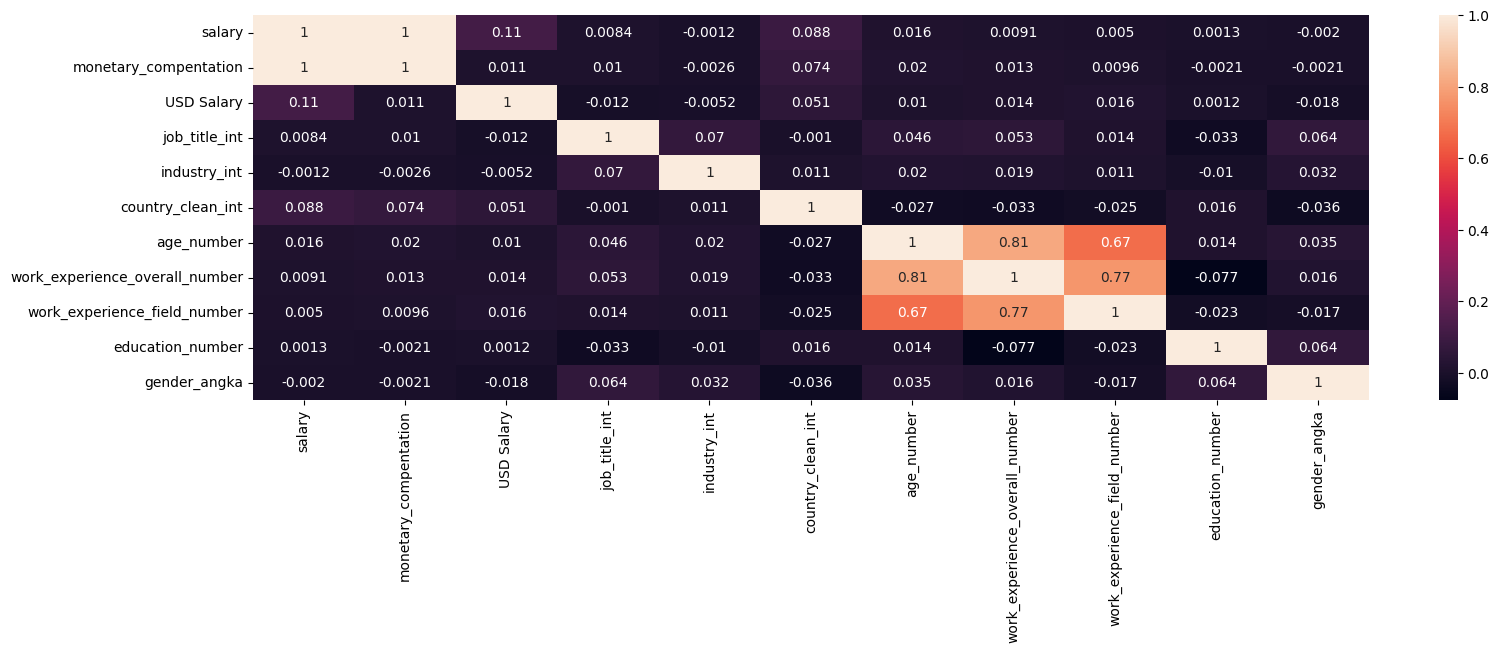

In [ ]:
#melihat korelasi data dengan heatmap, dan data yang dapat dilihat korelasoinya hanya data bertipe int
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True)
#pada gambar dibawah dapat dilihat korelasi tertinggi yang mempengaruhi salary

In [ ]:
# df = df[(df["job_title"]== "Software Engineer")]

Kode di bawah digunakan untuk membuat pairplot (scatterplot matrix) yang menampilkan hubungan antara age_number, work_experience_overall_number, work_experience_field_number, country_clean_int dengan variabel target yaitu yaitu "USD Salary"

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


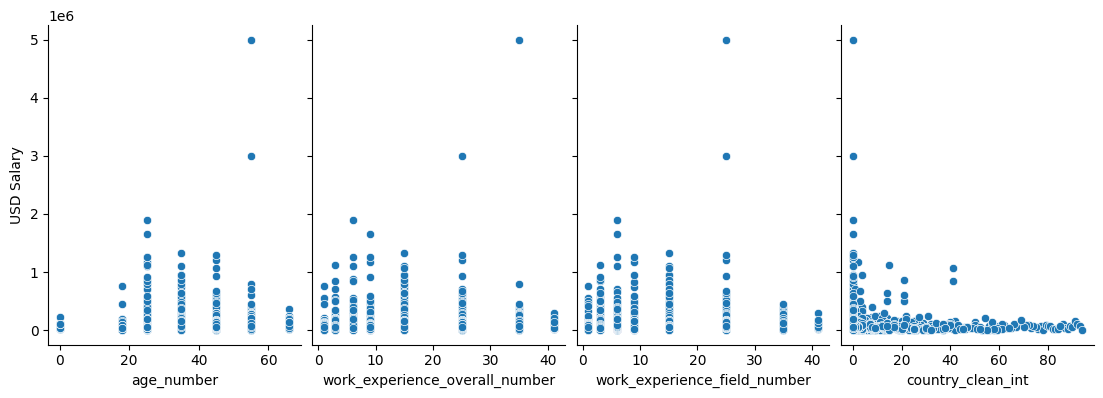

In [ ]:
# melihat korelasi future terhadap target apakah linaer atau tidak
# pada hasil korelasi dibawah dengan menggunakan scater plot
sns.pairplot(data=df , x_vars=['age_number','work_experience_overall_number','work_experience_field_number', 'country_clean_int'], y_vars=["USD Salary"] , size=4 , aspect=0.7)
#sns.show()

In [ ]:
#membagi data future dengan data target
X = df.loc[:,['age_number','work_experience_overall_number','work_experience_field_number', 'country_clean_int']]
y = df.loc[:,['USD Salary']]
#X sebagai feature = independent variable = variable bebas
#y sebagai label / Target = dependent variable = variable terikat
print(X)
print(y)

       age_number  work_experience_overall_number  \
0              25                               6   
1              25                               9   
2              25                               3   
3              25                               9   
4              25                               9   
...           ...                             ...   
27869          25                               6   
27870          45                              25   
27871          25                               3   
27872          18                               6   
27873          25                               1   

       work_experience_field_number  country_clean_int  
0                                 6                  0  
1                                 6                  2  
2                                 3                  0  
3                                 6                  0  
4                                 6                  0  
...                  

In [ ]:
#standarscaler digunakan agar tidak ada future yang memiliki nilai besar mendominasi mempengaruhi target , maka nilai dari setiap
#future dibuat dalam rentan yang sama
# rumus standar scaler = x - x(mean) / std(x)
#keterangan : x = future
# pada data salary diatas saya menggunakan standarscaller untuk melakukan standarisasi future data salary agar ukuran data future sama rata

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
#X_test = scaler.fit_transform(X_test)

print(X)

[[-0.77163679 -0.85082371 -0.48816911 -0.17579308]
 [-0.77163679 -0.47425939 -0.48816911  0.28496901]
 [-0.77163679 -1.22738802 -0.91490408 -0.17579308]
 ...
 [-0.77163679 -1.22738802 -0.91490408 -0.17579308]
 [-1.57441942 -0.85082371 -0.91490408 -0.17579308]
 [-0.77163679 -1.4784309  -1.19939407 -0.17579308]]


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.1 , random_state=0) 
#membagi data train dan data  test dengan menggunakan random test split dari sklearn dengan menggunakan random satate( untuk mengacak data) yaitu 100 data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=42)
print(f'data training feature: {X_train .shape}')
print(f'data testing feature: {X_test.shape}')
print(f'data training target : {y_train.shape}')
print(f'data testing target : {y_test.shape}')

data training feature: (24062, 4)
data testing feature: (2674, 4)
data training target : (24062, 1)
data testing target : (2674, 1)


In [ ]:
#membuat model linaer regresion untuk melakukan prediksi data
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()
regresion = regresion.fit(X_train , y_train)

In [ ]:
# pada model regresi linear menggunakan multiple linear regresion 

# rumus multiple linear regresion  
# y = a +m1*x1 + m2*x2
#keterangan 
# a = intercpt / kosntanta (yang mempengaruhi kemiringan garis) (nilai dari Y apabila x benilai =0)
# y = defendent var (target)
# m1 , m2 , .. mn = coefisien regresi (pengaruh positif ataupun negatif)
# jika var coef bernilai 0 maka y = b 

print(regresion.coef_)
print(regresion.intercept_)

[[  278.21275486 -2067.05571088 16248.56293231 -3181.7433842 ]]
[88357.5773142]


Fungsi cross_val_score akan mengembalikan nilai R-squared pada setiap fold yang kemudian dapat digunakan untuk mengevaluasi kinerja model Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cross_val_score(lr,X,y,cv=4)


array([0.01550086, 0.05495555, 0.04518831, 0.03584001])

melakukan evaluasi model regresi linear pada data uji

In [ ]:
from sklearn.metrics import mean_absolute_error , r2_score, mean_squared_error
y_pred = regresion.predict(X_test)

mse_rrg = mean_squared_error(y_test , y_pred)

print(f'Nilai r2 error = {r2_score(y_test,y_pred)}')
print(f'Nilai Mean Square Error {mse_rrg}')
print(f'Nilai regresion score = {regresion.score(X_test, y_test)}')

Nilai r2 error = 0.06139341213857874
Nilai Mean Square Error 3099457374.8196025
Nilai regresion score = 0.06139341213857874


SHAP (SHapley Additive exPlanations) adalah sebuah library pada Python untuk melakukan interpretasi model Machine Learning. Library ini memungkinkan pengguna untuk melihat kontribusi tiap fitur dalam model terhadap prediksi atau output yang dihasilkan oleh model. 

In [ ]:
%pip install shap==0.23.0
%pip install -I shap


In [ ]:
#melihat variable yang memiliki pengaruh penting terhadap target dengan menggunakan shap value
import shap
explainer = shap.Explainer(regresion.predict , X_test)
shap_value = explainer(X_test)

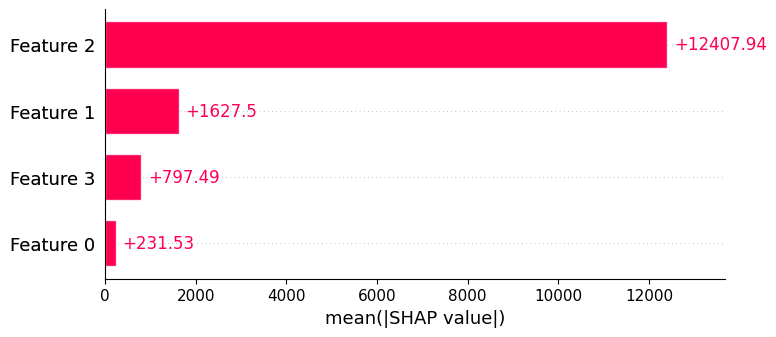

In [ ]:
#melihat pengaruh setiap future terhadap target dengan menggunakan shap value
shap_value
shap.plots.bar(shap_value)

In [ ]:
print(f'Nilai MSE Linear Regresion = {mse_rrg}')

Nilai MSE Linear Regresion = 3099457374.8196025


Memvisualisasikan hasil prediksi model regresi linier terhadap data asli.

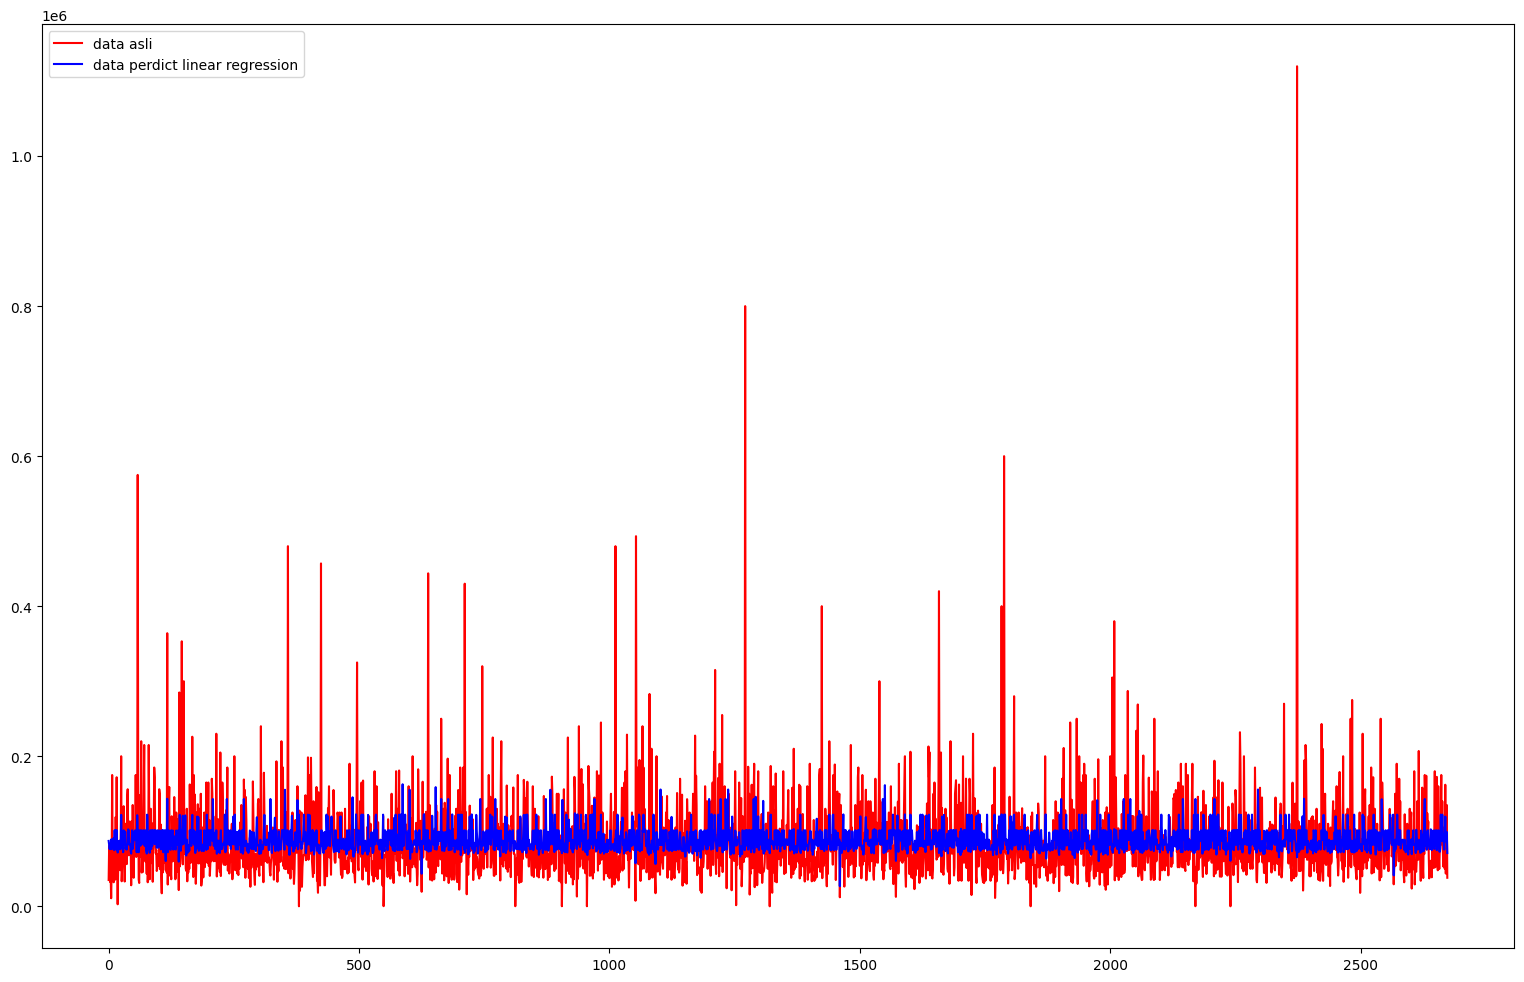

In [ ]:
y_dtr = pd.Series(np.ravel(y_pred))
plt.figure(figsize=(19,12))
x_data= np.arange(len(X_test))
y_data= y_test.values
plt.plot(x_data , y_data , c='r' ,label='data asli')
plt.plot(x_data , y_dtr , c='b' ,label='data perdict linear regression')
plt.legend()
